<a href="https://colab.research.google.com/github/1rubenito/data_science/blob/main/PROJETO_OCEAN_Personalidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big 5 Personality

*por `Rubens Gianfaldoni`*

<img width='60%' src='https://positivepsychology.com/wp-content/uploads/big-five.jpg'>

Teóricos da psicologia detectaram que a personalidade de um indivíduo pode ser distinta em 5 fatores:



1.   *Extroversion*(**Extroversão**) - sentir-se bem em ambientes coletivos, facilidade em se relacionar e lidar com pessoas. Inverso do introvertido.
2.   *Neuroticism*(**Estabilidade Emocional**) - nível de ansiedade elevada para lidar com grandes emoções, dificuldade para enfrentar com momentos de desafio.
3.   *Agreeableness*(**Amabilidade**) - colocar-se no lugar de outrem, indivíduo empático, tendência para perdoar. Inverso de quem pensa si mesmo, pouca empatia.
4.   *Conscientiousness*(**Autodisciplina**) - solucionador de problemas, persistente e organizado. Inverso de quem tem pouca disciplina e desordenado.
5.   *Open*(**Abertura**) - correm riscos, lidam com novas possibilidades, modificam-se facilmente. Inverso de quem prefere rotinas e difícil adaptação a mudanças.



O Big 5 é muito usado para avaliar candidatos para uma empresa.

Também é usado para distinguir dentro da empresa, quais funcionários podem se organizar melhor em grupos, baseados nesses 5 fatores.

Nesta análise iremos criar um modelo de clusterização com Kmeans e Yellowbrick, que juntas mostrarão em grupos, quais as melhores divisões possíveis para avaliar indivíduos.

Os dados podem ser vistos aqui : [Big Five Personality Test](https://www.kaggle.com/tunguz/big-five-personality-test)

---

##Importação dos dados

In [6]:
#importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import open

#biblioteca para ignorar erros 
import warnings
warnings.filterwarnings("ignore")

#configurar para o pandas exibir somente 150 colunas
pd.options.display.max_columns = 150

In [7]:
#criando variável para os dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJETOS/OCEAN/data-final.csv', sep='\t')

---

###Preparando os dados

In [8]:
#exibir 7 primeiras linhas
df.head(7)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0

In [9]:
#exibir quantidade de linhas e colunas
print('Linhas: {}'.format(df.shape[0]))
print('Colunas: {}'.format(df.shape[1]))

Linhas: 1015341
Colunas: 110


o `dataset` contém 110 colunas, porém como vamos avaliar somente as questões respondidas, elas estão vinculadas somente nas primeira 50 colunas, por isso vamos remover da coluna 51 em diante.

Dessa maneira ficará mais fácil para analisar com o `dataset`.

In [10]:
#excluir dados que não usaremos no dataset
df.drop(df.columns[50:110], axis=1, inplace=True)

In [11]:
#exibir 7 primeiras linhas com dataset após remoção de dados valor = 0.00
df.head(7)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,1.0,2.0,1.0,5.0,3.0,5.0,3.0,4.0,4.0,5.0,3.0,2.0,4.0,2.0,1.0,4.0,4.0,2.0,2.0,5.0,5.0,2.0,4.0,3.0,4.0,1.0,5.0,5.0,4.0,4.0


In [12]:
#exibir quantidade de linhas e colunas após remoção
print('Linhas: {}'.format(df.shape[0]))
print('Colunas: {}'.format(df.shape[1]))

Linhas: 1015341
Colunas: 50


Podemos verificar que existem muitas variáveis com valor 0.00, esse valor não agrega nenhum dado importante para a análise, visto que queremos valores que nos informem algo entre 1.0 e 5.0, neste caso iremos remover esses dados com valor = 0.00.

In [13]:
#melhor visualização do dataset
pd.options.display.float_format = '{:.2f}'.format

#exibir resumo estatístico do dataset
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [14]:
#exibir quantidade de valores = 0 na variável AGR5
df.AGR5.value_counts()

2.00    362339
1.00    292382
3.00    180153
4.00    116679
5.00     55482
0.00      6523
Name: AGR5, dtype: int64

In [15]:
#resumo estatístico de todos os valores = 0 do dataset
df[(df == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Vamos criar uma cópia do `dataset` para poder manipular melhor e não fazer mudanças no `dataset` original, para futuramente comparar o antes e depois.

In [16]:
#criar nova variável
df_new = df.copy()

Agora iremos remover todos os valores = 0 do dataset novo(df_new), para seguir com a análise.

In [17]:
#manter no dataset somente valores acima de 0.00
df_new = df_new[(df_new > 0.00).all(axis=1)]

In [18]:
#exibir quantidade de valores, após remoção do valor 0.00
df_new.AGR5.value_counts()

2.00    318520
1.00    251338
3.00    155746
4.00    101651
5.00     47179
Name: AGR5, dtype: int64

---

Baseado na teoria do teste em que consiste em identificar 5 traços de personalidade, faremos esta análise.

Como neste `dataset` não existe uma classe para virar alvo, usaremos metódo **não-supervisionado** de clusterização.

Para melhorar a visualização e trazer mais dados estatísticos para esta análise usaremos uma `API` que complementa o *scikit-learn*, o **yellowbrick**.

In [19]:
#instalar yellowbrick
!pip install -U yellowbrick 

     |████████████████████████████████| 276kB 4.1MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [20]:
#importar bibliotecas complementares
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [21]:
#instanciar os métodos
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))

Separando uma amostra de 5000 para podermos avaliar quantos clusters usaremos. E com a ajuda do módulo `Elbow` poderemos avaliar se 5 é o valor melhor para a criação dos clusters.

In [22]:
#selecionar uma amostra dos dados
df_amostra = df_new.sample(n=5000, random_state=1)

A linha pontilhada preta mostra como `5` o valor ideal para **k**.

Veja que quando `k=2` o valor é muito alto e desce rápido passando por `k=3` e `k=4`, depois de `k=5` a *reta azul* estabiliza, e é onde justamente o método nos mostra o número ideal de clusters para a amostra.

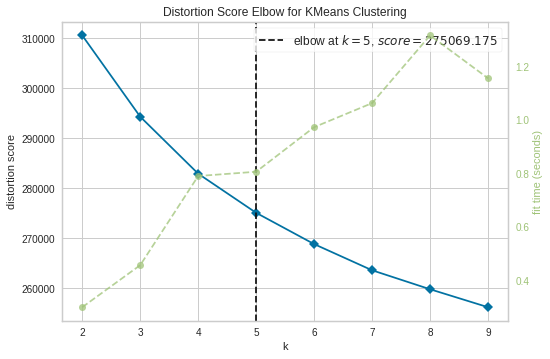

In [23]:
#exibir gráfico
visualizer.fit(df_amostra)
visualizer.poof();

Sabendo que `5` é a quantidade de clusters necessários. Vamos montar o modelo para treino.

In [24]:
#adicionar a quantidade de clusters para treino
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_new)

In [25]:
#inserir labels
pred = k_fit.labels_
df_new['Clusters'] = pred

In [26]:
#exibir dataset com nova coluna Clusters
df_new.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,1
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,3
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,3
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,0
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,1


In [27]:
#exibir quantidade para cada tipo de Cluster
df_new['Clusters'].value_counts()

2    193846
3    182678
1    181510
4    171762
0    144638
Name: Clusters, dtype: int64

In [28]:
#agrupar registros
df_new.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.16,3.44,2.80,3.58,2.62,2.86,2.13,3.70,2.71,3.98,2.44,3.72,3.13,2.99,2.40,2.11,2.41,2.02,2.71,2.39,3.10,2.99,2.68,2.85,3.29,2.74,3.15,2.94,2.67,3.07,3.27,2.93,3.82,2.49,2.43,2.83,3.54,2.60,2.88,3.51,3.73,1.95,3.80,2.05,3.80,2.05,4.09,3.32,3.91,3.85
1,3.48,1.94,4.34,2.21,4.28,1.66,3.90,2.80,3.77,2.51,2.32,3.85,3.14,3.32,2.11,1.91,2.11,1.67,2.12,1.72,1.89,4.45,1.85,4.25,1.87,3.85,1.60,4.10,4.09,4.20,3.74,2.60,4.19,1.91,3.12,2.30,3.87,1.95,3.58,3.89,3.91,1.75,4.10,1.79,4.17,1.66,4.33,3.26,4.11,4.30
2,3.45,1.92,3.79,2.51,4.05,1.82,3.65,2.77,3.77,3.01,3.84,2.94,4.26,2.41,3.29,3.49,3.82,3.47,3.66,3.19,2.14,4.30,2.65,4.20,2.00,4.02,1.85,3.91,4.14,3.86,2.99,3.62,3.86,3.24,2.23,3.52,3.48,2.83,2.95,3.50,3.78,2.10,4.27,1.95,3.97,1.76,3.99,3.40,4.22,4.21
3,2.14,3.28,3.13,3.64,3.00,2.69,2.24,3.99,2.34,4.12,3.50,3.11,4.14,2.64,2.81,2.78,2.84,2.41,2.95,2.68,1.86,3.98,1.67,4.38,1.96,4.18,1.99,4.00,4.19,3.74,3.85,2.22,4.29,2.01,3.25,2.06,4.17,2.02,3.84,3.89,3.56,2.16,3.87,2.08,3.71,2.00,4.00,2.95,4.25,3.78
4,1.80,3.64,2.24,4.07,2.30,3.19,1.74,4.09,2.17,4.49,4.29,2.45,4.53,2.13,3.57,3.90,4.00,3.78,4.01,3.96,2.45,3.39,2.57,3.86,2.54,3.88,2.70,3.45,3.69,3.07,2.84,3.36,3.82,3.48,2.10,3.49,3.58,3.04,2.79,3.32,3.52,2.38,4.07,2.12,3.43,2.09,3.69,3.18,4.29,3.72


Visualmente não é possível tirar uma média das variáveis do mesmo tipo, por exemplo de **EXT1** até **EXT 10** , **EST1** até **EST10** e assim por diante.

Por isso, vamos agrupar as colunas iguais e tirar as médias de cada grupo.

In [29]:
#criar grupos para média
grupos = list(df_new)

ext = grupos[0:10]
est = grupos[10:20]
agr = grupos[20:30]
csn = grupos[30:40]
opn = grupos[40:50]

In [30]:
#criar variáveis novas para melhor visualização da média
df_soma = pd.DataFrame()

df_soma['Extroversão'] = df_new[ext].sum(axis=1) / 10
df_soma['Estabilidade Emocional'] = df_new[est].sum(axis=1) / 10
df_soma['Amabilidade'] = df_new[agr].sum(axis=1) / 10
df_soma['Autodisciplina'] = df_new[csn].sum(axis=1) / 10
df_soma['Abertura'] = df_new[opn].sum(axis=1) / 10
df_soma['Clusters'] = pred

Agrupando os tipos, agora poderemos tirar uma média das colunas.

In [31]:
#exibir novo dataset após melhorias
df_soma.groupby('Clusters').mean()

,Extroversão,Estabilidade Emocional,Amabilidade,Autodisciplina,Abertura
Clusters,,,,,
0,3.00,2.63,2.95,3.03,3.26
1,3.09,2.43,3.21,3.11,3.34
2,3.07,3.44,3.31,3.22,3.37
3,3.06,2.99,3.19,3.16,3.24
4,2.97,3.66,3.16,3.18,3.25


In [32]:
#atribuir uma variável para a média dos grupos
df_clusters = df_soma.groupby('Clusters').mean()

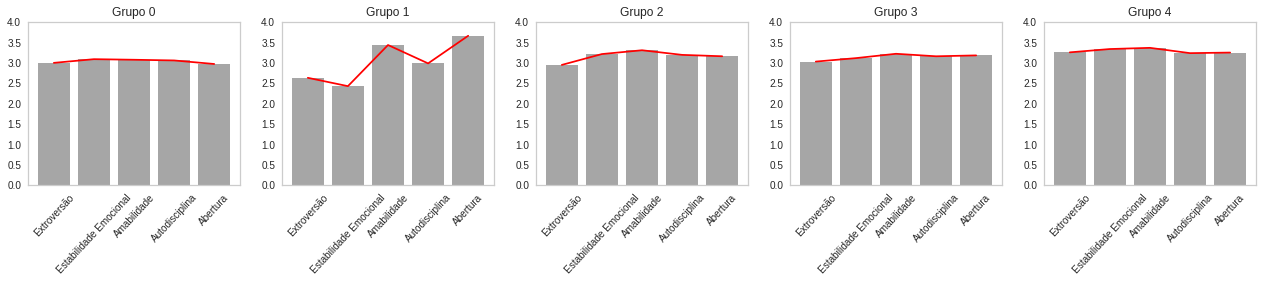

In [33]:
#plot de barras e linhas para os grupos
plt.figure(figsize=(22, 3))
for r in range(0, 5):
  plt.subplot(1, 5, r+1)
  plt.bar(df_clusters.columns, df_clusters.iloc[:, r], color='grey', alpha=0.7)
  plt.plot(df_clusters.columns, df_clusters.iloc[:, r], color='red')
  plt.title('Grupo ' + str(r))
  plt.grid(False)
  plt.xticks(rotation=47)
  plt.ylim(0, 4)

#Conclusão

Com essa metodologia, poderemos agora dividir os indivíduos em 5 grupos, avaliando os 5 fatores e por fim, classificar.

Com esse método pode-se reunir pessoas com as mesmas características a fim de aumentar diversas variáveis como: *produtividade*, *ambiente de trabalho*, entres outros.
